# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 파일 경로 설정 ---
# 현재 .ipynb 위치(models)에서 "한 단계 위(..)"의 'official_data_s' 폴더
folder_path = os.path.join("..", "official_data_s")

# [공급] 파일: CSV
supply_file_path = os.path.join(folder_path, "주차장정보현황(제공표준).csv")

# [수요] 파일: Excel
demand_excel_path = os.path.join(folder_path, "1_생활인구분석_LG유플러스.xlsx")
# [수요] 시트 이름 (방금 우리가 찾아낸 정확한 이름!)
demand_sheet_name = "33,34p 행정동별 시간대별 생활인구"


# --- 2. [공급] 데이터 로드 (CSV) ---
try:
    df_supply = pd.read_csv(supply_file_path, encoding='cp949')
    print("--- [공급] 주차장 데이터 (df_supply) ---")
    df_supply.info()
    print("\n[공급] 데이터 샘플 (head):")
    print(df_supply.head())
    
except Exception as e:
    print(f"!!! [공급] 파일 로드 실패 !!! \n{e}")


# --- 3. [수요] 데이터 로드 (Excel의 특정 시트) ---
try:
    # 엑셀 파일을 읽을 때는 'sheet_name'을 정확히 지정해야 함
    df_demand = pd.read_excel(demand_excel_path, 
                              sheet_name=demand_sheet_name, 
                              engine='openpyxl')
    
    print("\n\n--- [수요] 생활인구 데이터 (df_demand) ---")
    df_demand.info()
    print("\n[수요] 데이터 샘플 (head):")
    print(df_demand.head())

except ImportError:
    print("\n!!! [수요] 로드 실패: 'openpyxl' 라이브러리가 필요해.")
    print(">>> 터미널(Terminal)을 열고 'pip install openpyxl' 을 실행한 뒤 커널(Kernel)을 재시작해줘!")
except Exception as e:
    print(f"\n!!! [수요] 파일 로드 실패 !!! \n{e}")


# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 파일 경로 설정 (1단계와 동일) ---
folder_path = os.path.join("..", "official_data_s")
supply_file_path = os.path.join(folder_path, "주차장정보현황(제공표준).csv")
demand_excel_path = os.path.join(folder_path, "1_생활인구분석_LG유플러스.xlsx")
demand_sheet_name = "33,34p 행정동별 시간대별 생활인구"

# --- 2. 데이터 다시 불러오기 (1단계에서 이미 로드됨) ---
try:
    df_supply = pd.read_csv(supply_file_path, encoding='cp949')
    df_demand = pd.read_excel(demand_excel_path, 
                              sheet_name=demand_sheet_name, 
                              engine='openpyxl')
    print("--- 1단계 데이터 로드 (확인용) ---")
    print(f"[공급] df_supply 로드: {len(df_supply)} 행")
    print(f"[수요] df_demand 로드: {len(df_demand)} 행\n")
    
except Exception as e:
    print(f"!!! 파일 로드 실패 (1단계를 다시 확인하세요) !!! \n{e}")

    
# --- 3. [공급] df_supply에서 '읍면동' 키 추출 ---
# '소재지지번주소' (e.g., "경기도 파주시 [월롱면] ...")에서 3번째 조각(index 2)을 추출
try:
    # '소재지지번주소'가 null 값인 행이 있을 수 있으므로 .dropna()로 안전하게 처리
    df_supply = df_supply.dropna(subset=['소재지지번주소'])
    
    # .apply()와 람다 함수를 사용해 '읍면동_추출'이라는 새 컬럼 생성
    df_supply['읍면동_추출'] = df_supply['소재지지번주소'].apply(lambda x: x.split(' ')[2])
    
    # [공급] 데이터에서 추출한 고유 읍면동 목록
    supply_dong_list = df_supply['읍면동_추출'].unique()
    supply_dong_list.sort() # 가나다순 정렬

    print("--- [공급] 주차장 데이터의 '읍면동' 목록 (법정동/읍면) ---")
    print(f"(총 {len(supply_dong_list)}개)")
    print(supply_dong_list)

except Exception as e:
    print(f"!!! [공급] '소재지지번주소' 컬럼 처리 중 오류: {e}")
    print("df_supply['소재지지번주소'] 샘플:")
    print(df_supply['소재지지번주소'].head())


# --- 4. [수요] df_demand에서 '행정동' 키 추출 ---
try:
    # [수요] 데이터의 고유 행정동 목록
    demand_dong_list = df_demand['행정동'].unique()
    demand_dong_list.sort() # 가나다순 정렬
    
    print("\n\n--- [수요] 생활인구 데이터의 '행정동' 목록 ---")
    print(f"(총 {len(demand_dong_list)}개)")
    print(demand_dong_list)

except Exception as e:
    print(f"!!! [수요] '행정동' 컬럼 처리 중 오류: {e}")

# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 파일 경로 설정 (1단계와 동일) ---
folder_path = os.path.join("..", "official_data_s")
supply_file_path = os.path.join(folder_path, "주차장정보현황(제공표준).csv")
demand_excel_path = os.path.join(folder_path, "1_생활인구분석_LG유플러스.xlsx")
demand_sheet_name = "33,34p 행정동별 시간대별 생활인구"

# --- 2. 데이터 불러오기 (1단계에서 이미 로드됨) ---
try:
    df_supply = pd.read_csv(supply_file_path, encoding='cp949')
    df_demand = pd.read_excel(demand_excel_path, 
                              sheet_name=demand_sheet_name, 
                              engine='openpyxl')
except Exception as e:
    print(f"!!! 파일 로드 실패 (1단계를 다시 확인하세요) !!! \n{e}")

    
# --- 3. [공급] df_supply '읍면동_추출' 컬럼 생성 (2단계와 동일) ---
df_supply = df_supply.dropna(subset=['소재지지번주소'])
df_supply['읍면동_추출'] = df_supply['소재지지번주소'].apply(lambda x: x.split(' ')[2])


# --- 4. [핵심] "슈퍼 그룹" 매핑 딕셔너리 생성 ---

# [공급] 데이터를 위한 매핑 규칙 (법정동 -> 슈퍼 그룹)
supply_map = {
    # 1:1 매칭 (읍/면 지역)
    '광탄면': '광탄면', '문산읍': '문산읍', '법원읍': '법원읍', '월롱면': '월롱면',
    '적성면': '적성면', '조리읍': '조리읍', '탄현면': '탄현면', '파주읍': '파주읍', '파평면': '파평면',
    
    # [금촌 그룹]
    '금촌동': '금촌', '금릉동': '금촌', '아동동': '금촌', '신촌동': '금촌',
    
    # [운정 그룹]
    '다율동': '운정', '동패동': '운정', '목동동': '운정', '야당동': '운정', '와동동': '운정',
    
    # [교하 그룹]
    '문발동': '교하동', '서패동': '교하동',
    
    # '진동면'은 [수요] 목록에 없으므로 제외 (np.nan)
    '진동면': np.nan 
}

# [수요] 데이터를 위한 매핑 규칙 (행정동 -> 슈퍼 그룹)
demand_map = {
    # 1:1 매칭 (읍/면 지역 + 교하동)
    '광탄면': '광탄면', '문산읍': '문산읍', '법원읍': '법원읍', '월롱면': '월롱면',
    '적성면': '적성면', '조리읍': '조리읍', '탄현면': '탄현면', '파주읍': '파주읍', '파평면': '파평면',
    '교하동': '교하동',
    
    # [금촌 그룹]
    '금촌1동': '금촌', '금촌2동': '금촌', '금촌3동': '금촌',
    
    # [운정 그룹]
    '운정1동': '운정', '운정2동': '운정', '운정3동': '운정', '운정4동': '운정', '운정5동': '운정', '운정6동': '운정',
    
    # '장단면'은 [공급] 목록에 없으므로 제외 (np.nan)
    '장단면': np.nan
}


# --- 5. [공급] 데이터 집계 (Grouping) ---
# '읍면동_추출' 컬럼에 supply_map을 적용하여 '행정구역_그룹' 새 컬럼 생성
df_supply['행정구역_그룹'] = df_supply['읍면동_추출'].map(supply_map)
# 매핑에 실패한(np.nan) 행은 분석에서 제외
df_supply_grouped = df_supply.dropna(subset=['행정구역_그룹'])

# [공급] 최종 집계: '행정구역_그룹'별로 '주차구획수'를 모두 합산
df_supply_final = df_supply_grouped.groupby('행정구역_그룹')['주차구획수'].sum().reset_index()
df_supply_final = df_supply_final.rename(columns={'주차구획수': '총_주차면수'})

print("--- [공급] '슈퍼 그룹'별 총 주차면수 (df_supply_final) ---")
print(df_supply_final.sort_values(by='총_주차면수', ascending=False))


# --- 6. [수요] 데이터 집계 (Grouping) ---
# '행정동' 컬럼에 demand_map을 적용하여 '행정구역_그룹' 새 컬럼 생성
df_demand['행정구역_그룹'] = df_demand['행정동'].map(demand_map)
# 매핑에 실패한(np.nan) 행은 분석에서 제외
df_demand_grouped = df_demand.dropna(subset=['행정구역_그룹'])

# [수요] 최종 집계: '행정구역_그룹'과 '시간대'별로 '생활인구'를 모두 합산
df_demand_final = df_demand_grouped.groupby(['행정구역_그룹', '시간대'])['생활인구'].sum().reset_index()

print("\n\n--- [수요] '슈퍼 그룹'별/시간대별 총 생활인구 (df_demand_final) ---")
print(df_demand_final.head(10)) # 샘플 10개 출력

In [10]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 데이터 경로
data_folder = os.path.join("..", "official_data_s")
# [뼈대] 데이터 파일 (3단계 결과물)
base_data_path = os.path.join("normalization", "parking_congestion_index.csv")
# [근육] 관광 데이터 엑셀 파일
tourism_excel_path = os.path.join(data_folder, "3_관광지분석_LG유플러스.xlsx")

# --- 2. [뼈대] 데이터 로드 (확인용) ---
try:
    df_base = pd.read_csv(base_data_path, encoding='utf-8-sig')
    print(f"--- [뼈대] 데이터 로드 성공 --- \n'{base_data_path}' ({len(df_base)} 행)")
except Exception as e:
    print(f"!!! [뼈대] 파일 로드 실패 (3단계를 다시 확인하세요) !!! \n{e}")
    raise e # 오류 발생 시 중단

# --- 3. [근육] 관광 데이터 시트 목록 확인 ---
print(f"\n--- 관광 데이터 파일 경로 --- \n{tourism_excel_path}\n")

try:
    # 엑셀 파일의 모든 시트 이름 가져오기 (openpyxl 필요)
    xls = pd.ExcelFile(tourism_excel_path, engine='openpyxl')
    sheet_names = xls.sheet_names

    print("--- 관광 엑셀 파일의 전체 시트(Sheet) 목록 ---")
    for i, sheet in enumerate(sheet_names):
        print(f"시트 {i+1}: {sheet}")

    # --- 4. 우리가 찾는 시트 추정 ---
    # 시트 이름에 '시간대별'이 포함된 것을 찾음
    target_sheet = [s for s in sheet_names if "시간대별" in s]
    if target_sheet:
        print(f"\n>>> [추정] 우리가 찾는 '시간대별 관광객' 시트는 이거 같아! \n'{target_sheet[0]}'")
        # [추가] 해당 시트의 첫 5줄을 읽어서 컬럼명 확인
        df_tourism_sample = pd.read_excel(tourism_excel_path,
                                          sheet_name=target_sheet[0],
                                          engine='openpyxl')
        print("\n--- 해당 시트 샘플 (head) ---")
        print(df_tourism_sample.head())
        print("\n>>> 이 시트에서 '관광지명', '시간대(시)', '평균방문인구(명)' 컬럼을 사용하면 될 것 같아.")

    else:
        print("\n>>> [확인] 위 목록에서 '시간대별' 데이터가 있는 시트 이름을 찾아줘.")

except FileNotFoundError:
    print(f"!!! [오류] {tourism_excel_path} 파일을 찾을 수 없어.")
except ImportError:
    print("\n!!! [오류] 'openpyxl' 라이브러리가 필요해.")
    print(">>> 터미널(Terminal)을 열고 'pip install openpyxl' 을 실행한 뒤 커널(Kernel)을 재시작해줘!")
except Exception as e:
    print(f"!!! [오류] 엑셀 파일을 읽는 중 에러 발생: {e}")

--- [뼈대] 데이터 로드 성공 --- 
'normalization\parking_congestion_index.csv' (48 행)

--- 관광 데이터 파일 경로 --- 
..\official_data_s\3_관광지분석_LG유플러스.xlsx

--- 관광 엑셀 파일의 전체 시트(Sheet) 목록 ---
시트 1: 8p_월별_추이
시트 2: 9p_10p_관광지별_추이
시트 3: 11p_12p_관광지별_분포
시트 4: 13p_25p_37p_49p_61p_월별
시트 5: 14p_26p_38p_50p_62p_성연령별
시트 6: 14p_26p_38p_50p_62p_연령대별_추이
시트 7: 15p_27p_39p_51p_63p_요일별
시트 8: 15p_27p_39p_51p_63p_시간대별
시트 9: 16p_28p_40p_52p_64p_내외지인
시트 10: 17p_29p_41p_53p_65p_내국인
시트 11: 18p_30p_42p_54p_66p_외국인

>>> [추정] 우리가 찾는 '시간대별 관광객' 시트는 이거 같아! 
'15p_27p_39p_51p_63p_시간대별'

--- 해당 시트 샘플 (head) ---
      관광지명  시간대(시)   평균체류시간(분)   평균방문인구(명)
0  헤이리예술마을       0  159.334783  990.791304
1  헤이리예술마을       1  116.682609  605.900000
2  헤이리예술마을       2  114.139130  550.417391
3  헤이리예술마을       3  107.095652  546.195652
4  헤이리예술마을       4   98.713043  557.139130

>>> 이 시트에서 '관광지명', '시간대(시)', '평균방문인구(명)' 컬럼을 사용하면 될 것 같아.


In [9]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. [재구성] 1~3단계 핵심 로직 (이 셀을 독립적으로 실행하기 위함) ---

# --- 1.1. 경로 설정 ---
# [입력] 데이터 경로 (데이터가 있는 곳)
data_folder = os.path.join("..", "official_data_s")
supply_file_path = os.path.join(data_folder, "주차장정보현황(제공표준).csv")
demand_excel_path = os.path.join(data_folder, "1_생활인구분석_LG유플러스.xlsx")
demand_sheet_name = "33,34p 행정동별 시간대별 생활인구"

# [출력] 데이터 경로 (결과물을 저장할 곳)
# (현재 .ipynb 파일이 있는 'models' 폴더 내의 'normalization' 폴더)
output_folder = "normalization"

# --- 1.2. 원본 데이터 로드 ---
try:
    df_supply = pd.read_csv(supply_file_path, encoding='cp949')
    df_demand = pd.read_excel(demand_excel_path, 
                              sheet_name=demand_sheet_name, 
                              engine='openpyxl')
except Exception as e:
    print(f"!!! 원본 파일 로드 실패 (1단계를 다시 확인하세요) !!! \n{e}")
    # 오류 발생 시 중단
    raise e

# --- 1.3. [공급] 데이터 집계 (3단계와 동일) ---
df_supply = df_supply.dropna(subset=['소재지지번주소'])
df_supply['읍면동_추출'] = df_supply['소재지지번주소'].apply(lambda x: x.split(' ')[2])
supply_map = {
    '광탄면': '광탄면', '문산읍': '문산읍', '법원읍': '법원읍', '월롱면': '월롱면',
    '적성면': '적성면', '조리읍': '조리읍', '탄현면': '탄현면', '파주읍': '파주읍', '파평면': '파평면',
    '금촌동': '금촌', '금릉동': '금촌', '아동동': '금촌', '신촌동': '금촌',
    '다율동': '운정', '동패동': '운정', '목동동': '운정', '야당동': '운정', '와동동': '운정',
    '문발동': '교하동', '서패동': '교하동', '진동면': np.nan 
}
df_supply['행정구역_그룹'] = df_supply['읍면동_추출'].map(supply_map)
df_supply_grouped = df_supply.dropna(subset=['행정구역_그룹'])
df_supply_final = df_supply_grouped.groupby('행정구역_그룹')['주차구획수'].sum().reset_index()
df_supply_final = df_supply_final.rename(columns={'주차구획수': '총_주차면수'})

# --- 1.4. [수요] 데이터 집계 (3단계와 동일) ---
demand_map = {
    '광탄면': '광탄면', '문산읍': '문산읍', '법원읍': '법원읍', '월롱면': '월롱면',
    '적성면': '적성면', '조리읍': '조리읍', '탄현면': '탄현면', '파주읍': '파주읍', '파평면': '파평면',
    '교하동': '교하동',
    '금촌1동': '금촌', '금촌2동': '금촌', '금촌3동': '금촌',
    '운정1동': '운정', '운정2동': '운정', '운정3동': '운정', '운정4동': '운정', '운정5동': '운정', '운정6동': '운정',
    '장단면': np.nan
}
df_demand['행정구역_그룹'] = df_demand['행정동'].map(demand_map)
df_demand_grouped = df_demand.dropna(subset=['행정구역_그룹'])
df_demand_final = df_demand_grouped.groupby(['행정구역_그룹', '시간대'])['생활인구'].sum().reset_index()

print("--- 3단계 데이터 재구성 완료 ---")
print(f"[공급] df_supply_final (그룹별 주차면수): {len(df_supply_final)} 행")
print(f"[수요] df_demand_final (그룹/시간대별 생활인구): {len(df_demand_final)} 행")


# --- 2. [핵심] 4단계: [수요]와 [공급] 데이터 병합 ---
df_merged = pd.merge(df_demand_final, df_supply_final, on='행정구역_그룹', how='left')

print("\n\n--- 4.1. [병합] 수요 + 공급 데이터 (df_merged) ---")
print(df_merged.head())

# --- 3. "혼잡 예상 지수" 생성 ---
df_merged['총_주차면수'] = df_merged['총_주차면수'].replace(0, 1) # 0으로 나누기 방지
df_merged['혼잡예상지수'] = df_merged['생활인구'] / df_merged['총_주차면수']

print("\n\n--- 4.2. [분석] 혼잡 예상 지수 TOP 10 (가장 혼잡한 시간/지역) ---")
top_10_congested = df_merged.sort_values(by='혼잡예상지수', ascending=False)
print(top_10_congested.head(10))


# --- 4. [수정됨] 파일로 저장 ---
# 'normalization' 폴더가 없으면 자동으로 생성
os.makedirs(output_folder, exist_ok=True)

# 저장할 파일의 전체 경로를 생성
output_filename = os.path.join(output_folder, "parking_congestion_index.csv")

# CSV 파일로 저장
df_merged.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"\n\n--- 4.3. [저장] 핵심 데이터 저장 완료 ---")
print(f"'{output_filename}' 이름으로 저장되었습니다.")
print("다음 5단계에서 이 파일을 사용합니다.")

--- 3단계 데이터 재구성 완료 ---
[공급] df_supply_final (그룹별 주차면수): 12 행
[수요] df_demand_final (그룹/시간대별 생활인구): 48 행


--- 4.1. [병합] 수요 + 공급 데이터 (df_merged) ---
  행정구역_그룹     시간대          생활인구  총_주차면수
0     광탄면  00-06시   9331.702895     219
1     광탄면  06-09시  11499.760175     219
2     광탄면  12-15시  15522.214386     219
3     광탄면  18-21시  10815.397193     219
4     교하동  00-06시   8836.156930     198


--- 4.2. [분석] 혼잡 예상 지수 TOP 10 (가장 혼잡한 시간/지역) ---
   행정구역_그룹     시간대          생활인구  총_주차면수      혼잡예상지수
26     월롱면  12-15시  35289.742281     224  157.543492
6      교하동  12-15시  30234.713509     198  152.700573
33     조리읍  06-09시  25423.210175     217  117.157651
32     조리읍  00-06시  24346.444912     217  112.195599
34     조리읍  12-15시  24173.677368     217  111.399435
25     월롱면  06-09시  24178.156316     224  107.938198
35     조리읍  18-21시  23366.581228     217  107.680098
15     문산읍  18-21시  39688.025614     376  105.553260
12     문산읍  00-06시  39444.472632     376  104.905512
13     문산읍  06-09시  39246.727193

In [11]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 데이터 경로
data_folder = os.path.join("..", "official_data_s")
# [뼈대] 데이터 파일 (3단계 결과물)
base_data_path = os.path.join("normalization", "parking_congestion_index.csv")
# [근육] 관광 데이터 엑셀 파일 및 시트 이름
tourism_excel_path = os.path.join(data_folder, "3_관광지분석_LG유플러스.xlsx")
tourism_sheet_name = '15p_27p_39p_51p_63p_시간대별' # 이전 단계에서 확인한 시트 이름

# [출력] 데이터 경로 (결과물을 저장할 곳)
output_folder = "normalization"

# --- 2. [뼈대] 데이터 로드 ---
try:
    df_base = pd.read_csv(base_data_path, encoding='utf-8-sig')
    print(f"--- [뼈대] 데이터 로드 성공 --- \n'{base_data_path}' ({len(df_base)} 행)")
except Exception as e:
    print(f"!!! [뼈대] 파일 로드 실패 (3단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. [근육] 관광 데이터 로드 ---
try:
    df_tourism_raw = pd.read_excel(tourism_excel_path,
                                   sheet_name=tourism_sheet_name,
                                   engine='openpyxl')
    print(f"\n--- [근육] 관광 데이터 로드 성공 --- \n'{tourism_sheet_name}' 시트 ({len(df_tourism_raw)} 행)")
    print("\n관광 데이터 샘플 (head):")
    print(df_tourism_raw.head())

except Exception as e:
    print(f"!!! [근육] 관광 파일 로드 실패 !!! \n{e}")
    raise e

# --- 4. [핵심] 관광지명 -> 행정구역_그룹 매핑 ---
# 주요 관광지가 어느 행정구역_그룹에 속하는지 매핑 규칙 생성
# (이 부분은 실제 지리 정보나 추가 데이터가 필요할 수 있음. 우선 대표 관광지만 매핑)
tourism_spot_map = {
    '헤이리예술마을': '탄현면',
    '임진각평화누리': '문산읍', # 임진각은 문산읍에 위치
    '마장호수출렁다리': '광탄면', # 마장호수는 광탄면에 위치
    '공릉관광지': '조리읍',    # 공릉관광지(삼릉)는 조리읍에 위치
    'DMZ평화관광': '문산읍'     # DMZ 관광은 주로 문산읍 임진각에서 시작
    # 추가적인 관광지가 있다면 여기에 계속 추가해야 함
}

# '관광지명' 컬럼에 매핑 적용하여 '행정구역_그룹' 컬럼 생성
df_tourism_raw['행정구역_그룹'] = df_tourism_raw['관광지명'].map(tourism_spot_map)

# 매핑 결과 확인 (어떤 관광지가 매핑되었고, 안 되었는지)
print("\n\n--- 관광지명 -> 행정구역_그룹 매핑 결과 ---")
print("매핑 전 관광지 목록:", df_tourism_raw['관광지명'].unique())
print("매핑 후 그룹 목록:", df_tourism_raw['행정구역_그룹'].unique())

# 매핑에 실패한 행(NaN)이 있는지 확인하고, 있다면 어떤 관광지인지 출력
unmapped_spots = df_tourism_raw[df_tourism_raw['행정구역_그룹'].isna()]['관광지명'].unique()
if len(unmapped_spots) > 0:
    print(f"\n[주의] 다음 관광지는 행정구역_그룹으로 매핑되지 않았습니다: {unmapped_spots}")
    print("tourism_spot_map 딕셔너리에 추가해야 합니다.")
else:
    print("\n[성공] 모든 관광지가 행정구역_그룹으로 매핑되었습니다.")

# 매핑 성공한 데이터만 사용 (분석에서 제외)
df_tourism_mapped = df_tourism_raw.dropna(subset=['행정구역_그룹'])

# 필요한 컬럼만 선택 ('행정구역_그룹', '시간대(시)', '평균방문인구(명)')
df_tourism_selected = df_tourism_mapped[['행정구역_그룹', '시간대(시)', '평균방문인구(명)']].copy() # .copy()를 사용하여 SettingWithCopyWarning 방지

print("\n--- 최종 사용할 관광 데이터 컬럼 (매핑 완료) ---")
print(df_tourism_selected.head())

--- [뼈대] 데이터 로드 성공 --- 
'normalization\parking_congestion_index.csv' (48 행)

--- [근육] 관광 데이터 로드 성공 --- 
'15p_27p_39p_51p_63p_시간대별' 시트 (120 행)

관광 데이터 샘플 (head):
      관광지명  시간대(시)   평균체류시간(분)   평균방문인구(명)
0  헤이리예술마을       0  159.334783  990.791304
1  헤이리예술마을       1  116.682609  605.900000
2  헤이리예술마을       2  114.139130  550.417391
3  헤이리예술마을       3  107.095652  546.195652
4  헤이리예술마을       4   98.713043  557.139130


--- 관광지명 -> 행정구역_그룹 매핑 결과 ---
매핑 전 관광지 목록: ['헤이리예술마을' '임진각평화누리' '마장호수출렁다리' '공릉관광지' 'DMZ평화관광']
매핑 후 그룹 목록: ['탄현면' '문산읍' '광탄면' '조리읍']

[성공] 모든 관광지가 행정구역_그룹으로 매핑되었습니다.

--- 최종 사용할 관광 데이터 컬럼 (매핑 완료) ---
  행정구역_그룹  시간대(시)   평균방문인구(명)
0     탄현면       0  990.791304
1     탄현면       1  605.900000
2     탄현면       2  550.417391
3     탄현면       3  546.195652
4     탄현면       4  557.139130


In [12]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 (4단계 ①과 동일) ---
# [입력] 데이터 경로
data_folder = os.path.join("..", "official_data_s")
# [뼈대] 데이터 파일 (3단계 결과물)
base_data_path = os.path.join("normalization", "parking_congestion_index.csv")
# [근육] 관광 데이터 엑셀 파일 및 시트 이름
tourism_excel_path = os.path.join(data_folder, "3_관광지분석_LG유플러스.xlsx")
tourism_sheet_name = '15p_27p_39p_51p_63p_시간대별'

# [출력] 데이터 경로 (결과물을 저장할 곳)
output_folder = "normalization"

# --- 2. [재구성] 3단계 및 4단계 ①의 핵심 로직 ---

# --- 2.1. [뼈대] 데이터 로드 ---
try:
    df_base = pd.read_csv(base_data_path, encoding='utf-8-sig')
except Exception as e:
    print(f"!!! [뼈대] 파일 로드 실패 (3단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 2.2. [근육] 관광 데이터 로드 및 매핑 (4단계 ① 로직) ---
try:
    df_tourism_raw = pd.read_excel(tourism_excel_path,
                                   sheet_name=tourism_sheet_name,
                                   engine='openpyxl')
except Exception as e:
    print(f"!!! [근육] 관광 파일 로드 실패 !!! \n{e}")
    raise e

tourism_spot_map = {
    '헤이리예술마을': '탄현면', '임진각평화누리': '문산읍',
    '마장호수출렁다리': '광탄면', '공릉관광지': '조리읍', 'DMZ평화관광': '문산읍'
}
df_tourism_raw['행정구역_그룹'] = df_tourism_raw['관광지명'].map(tourism_spot_map)
df_tourism_mapped = df_tourism_raw.dropna(subset=['행정구역_그룹'])
df_tourism_selected = df_tourism_mapped[['행정구역_그룹', '시간대(시)', '평균방문인구(명)']].copy()

print("--- 4단계 ① (관광지 매핑) 완료 ---")
print(f"[근육] df_tourism_selected 생성: {df_tourism_selected.shape} 행") # (120, 3)

# --- 3. [핵심 ②] 시간대(시) -> 시간대 그룹 변환 ---

# '시간대(시)' 컬럼(0~23)을 뼈대 데이터의 시간대 그룹('00-06시' 등)으로 변환하는 함수
def map_hour_to_time_group(hour):
    if 0 <= hour < 6:
        return '00-06시'
    elif 6 <= hour < 9:
        return '06-09시'
    # --- 중요: 뼈대(df_base) 데이터의 시간대 그룹은 4개뿐 ---
    # 09-12시, 15-18시, 21-24시는 뼈대에 없으므로,
    # 여기서는 뼈대와 맞추기 위해 '12-15시', '18-21시' 그룹에 포함시키거나,
    # 분석의 편의를 위해 일단 None 처리 후 나중에 고려할 수 있음.
    # 여기서는 뼈대에 있는 그룹만 매핑하고 나머지는 제외 (None -> dropna)
    elif 12 <= hour < 15: # 9-12시 데이터는 일단 제외됨
        return '12-15시'
    elif 18 <= hour < 21: # 15-18시, 21-24시 데이터는 일단 제외됨
        return '18-21시'
    else:
        return None # 뼈대에 없는 시간대는 None 처리

# 함수를 적용하여 '시간대' 컬럼 생성
df_tourism_selected['시간대'] = df_tourism_selected['시간대(시)'].apply(map_hour_to_time_group)

# None 값(뼈대에 없는 시간대) 제거
df_tourism_time_grouped = df_tourism_selected.dropna(subset=['시간대'])

# 결과 확인
print("\n--- 시간대 변환 결과 (샘플) ---")
print(df_tourism_time_grouped[['시간대(시)', '시간대']].head())


# --- 4. 그룹별/시간대별 총 관광객 수 집계 ---
# '행정구역_그룹'과 '시간대'(변환된 그룹) 기준으로 '평균방문인구(명)' 합산
df_tourism_final = df_tourism_time_grouped.groupby(['행정구역_그룹', '시간대'])['평균방문인구(명)'].sum().reset_index()
df_tourism_final = df_tourism_final.rename(columns={'평균방문인구(명)': '총_관광객수'})

print("\n--- 그룹별/시간대별 총 관광객 수 (df_tourism_final 샘플) ---")
print(df_tourism_final.head())


# --- 5. [뼈대] + [관광] 데이터 병합 ---
# df_base (뼈대) 기준으로 df_tourism_final (관광) 데이터를 병합
df_merged_v2 = pd.merge(df_base, df_tourism_final, on=['행정구역_그룹', '시간대'], how='left')

# 관광객 데이터가 없는 행(NaN)은 0으로 채움 (관광지가 없는 지역/시간대)
df_merged_v2['총_관광객수'] = df_merged_v2['총_관광객수'].fillna(0)

print("\n\n--- 4단계 ② 결과: [병합] 뼈대 + 관광 데이터 (df_merged_v2) ---")
print("\n병합 데이터 샘플 (head):")
# '총_관광객수'가 잘 붙었는지 확인
print(df_merged_v2[['행정구역_그룹', '시간대', '생활인구', '총_관광객수', '총_주차면수']].head())

# --- 6. 새로운 "혼잡 예상 지수 v2" 생성 ---
# [혼잡예상지수_v2] = (생활인구 + 총_관광객수) / 총_주차면수
df_merged_v2['혼잡예상지수_v2'] = (df_merged_v2['생활인구'] + df_merged_v2['총_관광객수']) / df_merged_v2['총_주차면수']

print("\n\n--- [분석] 혼잡 예상 지수 v2 TOP 10 (관광객 반영) ---")
top_10_v2 = df_merged_v2.sort_values(by='혼잡예상지수_v2', ascending=False)
# v1(기존)과 v2(신규) 지수를 비교 출력
print(top_10_v2[['행정구역_그룹', '시간대', '혼잡예상지수', '총_관광객수', '혼잡예상지수_v2']].head(10))

# --- 7. 파일로 저장 ---
os.makedirs(output_folder, exist_ok=True)
output_filename_v2 = os.path.join(output_folder, "parking_congestion_index_v2_tourism.csv")
df_merged_v2.to_csv(output_filename_v2, index=False, encoding='utf-8-sig')

print(f"\n\n--- [저장] 관광 데이터 반영된 4단계 결과 저장 완료 ---")
print(f"'{output_filename_v2}' 이름으로 저장되었습니다.")

--- 4단계 ① (관광지 매핑) 완료 ---
[근육] df_tourism_selected 생성: (120, 3) 행

--- 시간대 변환 결과 (샘플) ---
   시간대(시)     시간대
0       0  00-06시
1       1  00-06시
2       2  00-06시
3       3  00-06시
4       4  00-06시

--- 그룹별/시간대별 총 관광객 수 (df_tourism_final 샘플) ---
  행정구역_그룹     시간대        총_관광객수
0     광탄면  00-06시    666.134783
1     광탄면  06-09시   1602.543478
2     광탄면  12-15시  13375.091304
3     광탄면  18-21시   1368.443478
4     문산읍  00-06시   1958.309272


--- 4단계 ② 결과: [병합] 뼈대 + 관광 데이터 (df_merged_v2) ---

병합 데이터 샘플 (head):
  행정구역_그룹     시간대          생활인구        총_관광객수  총_주차면수
0     광탄면  00-06시   9331.702895    666.134783     219
1     광탄면  06-09시  11499.760175   1602.543478     219
2     광탄면  12-15시  15522.214386  13375.091304     219
3     광탄면  18-21시  10815.397193   1368.443478     219
4     교하동  00-06시   8836.156930      0.000000     198


--- [분석] 혼잡 예상 지수 v2 TOP 10 (관광객 반영) ---
   행정구역_그룹     시간대      혼잡예상지수        총_관광객수   혼잡예상지수_v2
14     문산읍  12-15시  101.469046  22114.096000  160.283131
26     월롱면

In [13]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 데이터 경로
data_folder = os.path.join("..", "official_data_s")
# [뼈대 v2] 데이터 파일 (4단계 결과물)
base_v2_path = os.path.join("normalization", "parking_congestion_index_v2_tourism.csv")
# [근육] 상권 데이터 엑셀 파일
sales_excel_path = os.path.join(data_folder, "5_식품위생업소소비분석_삼성카드.xlsx")

# --- 2. [뼈대 v2] 데이터 로드 (확인용) ---
try:
    df_base_v2 = pd.read_csv(base_v2_path, encoding='utf-8-sig')
    print(f"--- [뼈대 v2] 데이터 로드 성공 --- \n'{base_v2_path}' ({len(df_base_v2)} 행)")
except Exception as e:
    print(f"!!! [뼈대 v2] 파일 로드 실패 (4단계를 다시 확인하세요) !!! \n{e}")
    raise e # 오류 발생 시 중단

# --- 3. [근육] 상권 데이터 시트 목록 확인 ---
print(f"\n--- 상권 데이터 파일 경로 --- \n{sales_excel_path}\n")

try:
    # 엑셀 파일의 모든 시트 이름 가져오기 (openpyxl 필요)
    xls = pd.ExcelFile(sales_excel_path, engine='openpyxl')
    sheet_names = xls.sheet_names

    print("--- 상권 엑셀 파일의 전체 시트(Sheet) 목록 ---")
    for i, sheet in enumerate(sheet_names):
        print(f"시트 {i+1}: {sheet}")

    # --- 4. 우리가 찾는 시트 추정 ---
    # 시트 이름에 '행정동별'과 '시간대별'이 모두 포함된 것을 찾음
    target_sheet = [s for s in sheet_names if "행정동별" in s and "시간대별" in s]
    if target_sheet:
        print(f"\n>>> [추정] 우리가 찾는 '행정동별 시간대별 매출액' 시트는 이거 같아! \n'{target_sheet[0]}'")
        # [추가] 해당 시트의 첫 5줄을 읽어서 컬럼명 확인
        df_sales_sample = pd.read_excel(sales_excel_path,
                                        sheet_name=target_sheet[0],
                                        engine='openpyxl')
        print("\n--- 해당 시트 샘플 (head) ---")
        print(df_sales_sample.head())
        print("\n>>> 이 시트에서 '행정동명', '시간대 관련 컬럼', '매출액 관련 컬럼'을 사용하면 될 것 같아.")

    else:
        print("\n>>> [확인] 위 목록에서 '행정동별 시간대별 매출액' 데이터가 있는 시트 이름을 찾아줘.")

except FileNotFoundError:
    print(f"!!! [오류] {sales_excel_path} 파일을 찾을 수 없어.")
except ImportError:
    print("\n!!! [오류] 'openpyxl' 라이브러리가 필요해.")
    print(">>> 터미널(Terminal)을 열고 'pip install openpyxl' 을 실행한 뒤 커널(Kernel)을 재시작해줘!")
except Exception as e:
    print(f"!!! [오류] 엑셀 파일을 읽는 중 에러 발생: {e}")

--- [뼈대 v2] 데이터 로드 성공 --- 
'normalization\parking_congestion_index_v2_tourism.csv' (48 행)

--- 상권 데이터 파일 경로 --- 
..\official_data_s\5_식품위생업소소비분석_삼성카드.xlsx

--- 상권 엑셀 파일의 전체 시트(Sheet) 목록 ---
시트 1: 4,6p 행정동별 식품위생업소분포
시트 2: 4p,9p 식품위생업소 분류별 현황
시트 3: 5,11p 식품위생업소 변화
시트 4: 5p,11p 행정동별 식품위생업소 수, 매출액 증감
시트 5: 7,13p 음식점 변화
시트 6: 12,14p 행정동별 음식점 음료점 매출액
시트 7: 7,8,13,14p 행정동별 음식음료점 수, 매출액 증감
시트 8: 15p 요일별 평균 매출액
시트 9: 15p 주중주말 매출액변화
시트 10: 16p 행정동별 주중주말 매출액
시트 11: 17p 시간대별 매출액 변화
시트 12: 17,18p 행정동별 시간대별 매출액
시트 13: 19p 성별연령대별 매출액, 변화
시트 14: 20-22p 행정동별 성연령대별 매출액

>>> [추정] 우리가 찾는 '행정동별 시간대별 매출액' 시트는 이거 같아! 
'17,18p 행정동별 시간대별 매출액'

--- 해당 시트 샘플 (head) ---
   행정동명  12-15시_평균매출액_백만원  18-21시_평균매출액_백만원  기타시간대_평균매출액_백만원
0   광탄면         42.016143         19.060667        32.330738
1   교하동        137.812333         65.101429        96.051143
2  금촌1동         46.849667         55.282000        63.239738
3  금촌2동         19.769905         31.808143        40.585405
4  금촌3동         10.158095          9.746714 

In [14]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 데이터 경로
data_folder = os.path.join("..", "official_data_s")
# [뼈대 v2] 데이터 파일 (4단계 결과물)
base_v2_path = os.path.join("normalization", "parking_congestion_index_v2_tourism.csv")
# [근육] 상권 데이터 엑셀 파일 및 시트 이름
sales_excel_path = os.path.join(data_folder, "5_식품위생업소소비분석_삼성카드.xlsx")
sales_sheet_name = '17,18p 행정동별 시간대별 매출액' # 이전 단계에서 확인한 시트 이름

# [출력] 데이터 경로 (결과물을 저장할 곳)
output_folder = "normalization"

# --- 2. [재구성] 4단계 및 5단계 ① 로직 ---

# --- 2.1. [뼈대 v2] 데이터 로드 ---
try:
    df_base_v2 = pd.read_csv(base_v2_path, encoding='utf-8-sig')
except Exception as e:
    print(f"!!! [뼈대 v2] 파일 로드 실패 (4단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 2.2. [근육] 상권 데이터 로드 (5단계 ①) ---
try:
    df_sales_raw = pd.read_excel(sales_excel_path,
                                 sheet_name=sales_sheet_name,
                                 engine='openpyxl')
    print(f"--- [근육] 상권 데이터 로드 성공 --- \n'{sales_sheet_name}' 시트 ({len(df_sales_raw)} 행)")
    print("\n상권 데이터 샘플 (head):")
    print(df_sales_raw.head())

except Exception as e:
    print(f"!!! [근육] 상권 파일 로드 실패 !!! \n{e}")
    raise e

# --- 3. [핵심 ①] 행정동명 -> 행정구역_그룹 매핑 ---
# (2단계에서 사용한 demand_map 재활용)
demand_map = {
    '광탄면': '광탄면', '문산읍': '문산읍', '법원읍': '법원읍', '월롱면': '월롱면',
    '적성면': '적성면', '조리읍': '조리읍', '탄현면': '탄현면', '파주읍': '파주읍', '파평면': '파평면',
    '교하동': '교하동',
    '금촌1동': '금촌', '금촌2동': '금촌', '금촌3동': '금촌',
    '운정1동': '운정', '운정2동': '운정', '운정3동': '운정', '운정4동': '운정', '운정5동': '운정', '운정6동': '운정',
    '장단면': np.nan # 장단면은 매출 데이터에 없을 수 있음
}
df_sales_raw['행정구역_그룹'] = df_sales_raw['행정동명'].map(demand_map)
df_sales_mapped = df_sales_raw.dropna(subset=['행정구역_그룹'])

# --- 4. [핵심 ②] 데이터 재구성 (시간대 컬럼 -> 시간대 행) ---
# pd.melt 함수를 사용하여 'wide' 포맷 -> 'long' 포맷으로 변경
df_sales_long = pd.melt(df_sales_mapped,
                        id_vars=['행정구역_그룹'],
                        value_vars=['12-15시_평균매출액_백만원',
                                    '18-21시_평균매출액_백만원',
                                    '기타시간대_평균매출액_백만원'],
                        var_name='시간대_원본',
                        value_name='매출액_백만원')

print("\n--- 시간대 데이터 재구성 (long format 샘플) ---")
print(df_sales_long.head())

# --- 5. [핵심 ③] 시간대 문자열 -> 시간대 그룹 매핑 ---
def map_sales_time_to_group(time_str):
    if '12-15시' in time_str:
        return '12-15시'
    elif '18-21시' in time_str:
        return '18-21시'
    elif '기타시간대' in time_str:
        # 기타 시간대는 '00-06시'와 '06-09시' 모두에 적용하기 위해 임시 값 부여
        return '기타'
    else:
        return None

df_sales_long['시간대_그룹_임시'] = df_sales_long['시간대_원본'].apply(map_sales_time_to_group)

# '기타' 시간대 데이터를 복제하여 '00-06시'와 '06-09시'로 확장
df_sales_기타 = df_sales_long[df_sales_long['시간대_그룹_임시'] == '기타'].copy()
df_sales_기타_0006 = df_sales_기타.copy()
df_sales_기타_0609 = df_sales_기타.copy()
df_sales_기타_0006['시간대'] = '00-06시'
df_sales_기타_0609['시간대'] = '06-09시'

# 나머지 시간대 데이터 처리
df_sales_나머지 = df_sales_long[df_sales_long['시간대_그룹_임시'] != '기타'].copy()
df_sales_나머지['시간대'] = df_sales_나머지['시간대_그룹_임시'] # 그대로 사용

# 데이터 합치기
df_sales_processed = pd.concat([df_sales_나머지, df_sales_기타_0006, df_sales_기타_0609], ignore_index=True)

# 필요한 컬럼만 선택
df_sales_final = df_sales_processed[['행정구역_그룹', '시간대', '매출액_백만원']].copy()

# 그룹별/시간대별 평균 매출액 계산 (동일 그룹/시간대에 여러 행이 있을 경우 대비)
# 여기서는 원본 데이터가 이미 집계된 형태이므로 중복은 없을 것으로 예상
df_sales_final = df_sales_final.groupby(['행정구역_그룹', '시간대'])['매출액_백만원'].mean().reset_index()


print("\n--- 최종 상권 데이터 (그룹/시간대별 매출액 샘플) ---")
print(df_sales_final.head())


# --- 6. [뼈대 v2] + [상권] 데이터 병합 ---
df_merged_v3 = pd.merge(df_base_v2, df_sales_final, on=['행정구역_그룹', '시간대'], how='left')

# 매출액 데이터가 없는 경우(NaN)는 0으로 채움
df_merged_v3['매출액_백만원'] = df_merged_v3['매출액_백만원'].fillna(0)
# 매출액이 음수(-)인 경우는 0으로 처리 (데이터 오류 가능성)
df_merged_v3['매출액_백만원'] = df_merged_v3['매출액_백만원'].apply(lambda x: max(x, 0))


print("\n\n--- 5단계 결과: [병합] 뼈대v2 + 상권 데이터 (df_merged_v3) ---")
print("\n병합 데이터 샘플 (head):")
# '매출액_백만원'이 잘 붙었는지 확인
print(df_merged_v3[['행정구역_그룹', '시간대', '생활인구', '총_관광객수', '총_주차면수', '매출액_백만원']].head())


# --- 7. "상권 가중치" 및 "혼잡 예상 지수 v3" 생성 ---

# 전체 평균 매출액 계산 (가중치 기준 설정)
# (0인 매출액은 평균 계산 시 제외할 수 있으나, 여기서는 포함하여 계산)
average_sales = df_merged_v3['매출액_백만원'].mean()
print(f"\n전체 평균 매출액(백만원): {average_sales:.2f}")

# 상권 가중치 계산: (해당 지역/시간대 매출액 / 전체 평균 매출액)
# 평균 매출액이 0일 경우 1로 처리 (0으로 나누기 방지)
if average_sales > 0:
    df_merged_v3['상권가중치'] = df_merged_v3['매출액_백만원'] / average_sales
else:
    df_merged_v3['상권가중치'] = 1 # 평균이 0이면 가중치 1 부여

# 가중치는 최소 0.5 ~ 최대 2 정도로 제한하여 너무 극단적인 영향을 막을 수 있음 (선택 사항)
# df_merged_v3['상권가중치'] = np.clip(df_merged_v3['상권가중치'], 0.5, 2.0)

# [혼잡예상지수_v3] = (생활인구 + 총_관광객수) * 상권가중치 / 총_주차면수
df_merged_v3['혼잡예상지수_v3'] = (df_merged_v3['생활인구'] + df_merged_v3['총_관광객수']) * df_merged_v3['상권가중치'] / df_merged_v3['총_주차면수']


print("\n\n--- [분석] 혼잡 예상 지수 v3 TOP 10 (상권 반영) ---")
top_10_v3 = df_merged_v3.sort_values(by='혼잡예상지수_v3', ascending=False)
# v2(이전)와 v3(신규) 지수를 비교 출력
print(top_10_v3[['행정구역_그룹', '시간대', '혼잡예상지수_v2', '매출액_백만원', '상권가중치', '혼잡예상지수_v3']].head(10))

# --- 8. 파일로 저장 ---
os.makedirs(output_folder, exist_ok=True)
output_filename_v3 = os.path.join(output_folder, "parking_congestion_index_v3_sales.csv")
df_merged_v3.to_csv(output_filename_v3, index=False, encoding='utf-8-sig')

print(f"\n\n--- [저장] 상권 데이터 반영된 5단계 결과 저장 완료 ---")
print(f"'{output_filename_v3}' 이름으로 저장되었습니다.")

--- [근육] 상권 데이터 로드 성공 --- 
'17,18p 행정동별 시간대별 매출액' 시트 (20 행)

상권 데이터 샘플 (head):
   행정동명  12-15시_평균매출액_백만원  18-21시_평균매출액_백만원  기타시간대_평균매출액_백만원
0   광탄면         42.016143         19.060667        32.330738
1   교하동        137.812333         65.101429        96.051143
2  금촌1동         46.849667         55.282000        63.239738
3  금촌2동         19.769905         31.808143        40.585405
4  금촌3동         10.158095          9.746714        12.284405

--- 시간대 데이터 재구성 (long format 샘플) ---
  행정구역_그룹            시간대_원본     매출액_백만원
0     광탄면  12-15시_평균매출액_백만원   42.016143
1     교하동  12-15시_평균매출액_백만원  137.812333
2      금촌  12-15시_평균매출액_백만원   46.849667
3      금촌  12-15시_평균매출액_백만원   19.769905
4      금촌  12-15시_평균매출액_백만원   10.158095

--- 최종 상권 데이터 (그룹/시간대별 매출액 샘플) ---
  행정구역_그룹     시간대    매출액_백만원
0     광탄면  00-06시  32.330738
1     광탄면  06-09시  32.330738
2     광탄면  12-15시  42.016143
3     광탄면  18-21시  19.060667
4     교하동  00-06시  96.051143


--- 5단계 결과: [병합] 뼈대v2 + 상권 데이터 (df_merged_v3) ---

병합 데이터 샘플 (hea

In [15]:
# --- 4.1. 관광지명 -> 행정구역_그룹 매핑 ---
tourism_spot_map = {
    '헤이리예술마을': '탄현면', '임진각평화누리': '문산읍', # ... (나머지 매핑) ...
}
df_tourism_raw['행정구역_그룹'] = df_tourism_raw['관광지명'].map(tourism_spot_map)
df_tourism_selected = df_tourism_raw.dropna(subset=['행정구역_그룹'])[['행정구역_그룹', '시간대(시)', '평균방문인구(명)']].copy()

# --- 4.2. 시간대(시) -> 시간대 그룹 변환 함수 ---
def map_hour_to_time_group(hour):
    if 0 <= hour < 6: return '00-06시'
    elif 6 <= hour < 9: return '06-09시'
    elif 12 <= hour < 15: return '12-15시'
    elif 18 <= hour < 21: return '18-21시'
    else: return None # 뼈대에 없는 시간대 제외

df_tourism_selected['시간대'] = df_tourism_selected['시간대(시)'].apply(map_hour_to_time_group)
df_tourism_time_grouped = df_tourism_selected.dropna(subset=['시간대'])

# --- 4.3. 그룹별/시간대별 총 관광객 수 집계 ---
df_tourism_final = df_tourism_time_grouped.groupby(['행정구역_그룹', '시간대'])['평균방문인구(명)'].sum().reset_index()
df_tourism_final = df_tourism_final.rename(columns={'평균방문인구(명)': '총_관광객수'})

# --- 4.4. [뼈대] + [관광] 데이터 병합 ---
df_merged_v2 = pd.merge(df_base, df_tourism_final, on=['행정구역_그룹', '시간대'], how='left')
df_merged_v2['총_관광객수'] = df_merged_v2['총_관광객수'].fillna(0) # NaN 처리

# --- 4.5. 혼잡예상지수_v2 계산 ---
df_merged_v2['혼잡예상지수_v2'] = (df_merged_v2['생활인구'] + df_merged_v2['총_관광객수']) / df_merged_v2['총_주차면수']

# --- 4.6. 결과 저장 ---
output_filename_v2 = os.path.join("normalization", "parking_congestion_index_v2_tourism.csv")
df_merged_v2.to_csv(output_filename_v2, index=False, encoding='utf-8-sig')

print("--- 4단계 결과 (v2 계산 및 저장 완료) ---")
print(df_merged_v2[['행정구역_그룹', '시간대', '총_관광객수', '혼잡예상지수_v2']].head())

--- 4단계 결과 (v2 계산 및 저장 완료) ---
  행정구역_그룹     시간대  총_관광객수  혼잡예상지수_v2
0     광탄면  00-06시     0.0  42.610516
1     광탄면  06-09시     0.0  52.510320
2     광탄면  12-15시     0.0  70.877691
3     광탄면  18-21시     0.0  49.385375
4     교하동  00-06시     0.0  44.627055


In [16]:
# --- 5.1. 상권 데이터 로드 및 행정동 매핑 ---
df_sales_raw = pd.read_excel(sales_excel_path, sheet_name=sales_sheet_name, engine='openpyxl')
df_sales_raw['행정구역_그룹'] = df_sales_raw['행정동명'].map(demand_map) # 2단계 map 재활용
df_sales_mapped = df_sales_raw.dropna(subset=['행정구역_그룹'])

# --- 5.2. 데이터 재구성 (Wide -> Long format) ---
df_sales_long = pd.melt(df_sales_mapped,
                        id_vars=['행정구역_그룹'],
                        value_vars=['12-15시_평균매출액_백만원', '18-21시_평균매출액_백만원', '기타시간대_평균매출액_백만원'],
                        var_name='시간대_원본', value_name='매출액_백만원')

# --- 5.3. 시간대 문자열 -> 시간대 그룹 매핑 (기타시간대 확장 포함) ---
def map_sales_time_to_group(time_str):
    if '12-15시' in time_str: return '12-15시'
    elif '18-21시' in time_str: return '18-21시'
    elif '기타시간대' in time_str: return '기타'
    else: return None
df_sales_long['시간대_그룹_임시'] = df_sales_long['시간대_원본'].apply(map_sales_time_to_group)
# ... ('기타'를 '00-06시', '06-09시'로 확장하는 코드) ...
# df_sales_final = ... (최종 그룹별/시간대별 매출액 집계) ...

# --- 5.4. [뼈대 v2] + [상권] 데이터 병합 ---
df_merged_v3 = pd.merge(df_base_v2, df_sales_final, on=['행정구역_그룹', '시간대'], how='left')
df_merged_v3['매출액_백만원'] = df_merged_v3['매출액_백만원'].fillna(0).apply(lambda x: max(x, 0)) # NaN 및 음수 처리

# --- 5.5. 상권 가중치 계산 ---
average_sales = df_merged_v3['매출액_백만원'].mean()
df_merged_v3['상권가중치'] = df_merged_v3['매출액_백만원'] / average_sales if average_sales > 0 else 1

# --- 5.6. 혼잡예상지수_v3 계산 ---
df_merged_v3['혼잡예상지수_v3'] = (df_merged_v3['생활인구'] + df_merged_v3['총_관광객수']) * df_merged_v3['상권가중치'] / df_merged_v3['총_주차면수']

# --- 5.7. 결과 저장 ---
output_filename_v3 = os.path.join(output_folder, "parking_congestion_index_v3_sales.csv")
df_merged_v3.to_csv(output_filename_v3, index=False, encoding='utf-8-sig')

print("--- 5단계 결과 (v3 계산 및 저장 완료) ---")
print(df_merged_v3[['행정구역_그룹', '시간대', '매출액_백만원', '상권가중치', '혼잡예상지수_v3']].head())

--- 5단계 결과 (v3 계산 및 저장 완료) ---
  행정구역_그룹     시간대    매출액_백만원     상권가중치   혼잡예상지수_v3
0     광탄면  00-06시  32.330738  0.802717   36.645813
1     광탄면  06-09시  32.330738  0.802717   48.024842
2     광탄면  12-15시  42.016143  1.043189  137.649994
3     광탄면  18-21시  19.060667  0.473244   26.328430
4     교하동  00-06시  96.051143  2.384785  106.425952


--- 최종 데이터 로드 성공 --- 
'normalization\parking_congestion_index_v3_sales.csv' (48 행)

최종 데이터 컬럼: ['행정구역_그룹', '시간대', '생활인구', '총_주차면수', '혼잡예상지수', '총_관광객수', '혼잡예상지수_v2', '매출액_백만원', '상권가중치', '혼잡예상지수_v3']


--- [분석 1] 혼잡 예상 지수 v3 TOP 10 (최종) ---
   행정구역_그룹     시간대   혼잡예상지수_v3
6      교하동  12-15시  522.487049
14     문산읍  12-15시  277.906023
13     문산읍  06-09시  240.586921
12     문산읍  00-06시  219.816387
15     문산읍  18-21시  196.615834
5      교하동  06-09시  172.854475
7      교하동  18-21시  141.224080
20      운정  00-06시  139.859628
2      광탄면  12-15시  137.649994
21      운정  06-09시  131.154119


--- [분석 2] 혼잡 예상 지수 v3 BOTTOM 10 (최종) ---
   행정구역_그룹     시간대  혼잡예상지수_v3
47     파평면  18-21시   1.180996
44     파평면  00-06시   1.634399
45     파평면  06-09시   1.795332
31     적성면  18-21시   3.719111
46     파평면  12-15시   4.194621
28     적성면  00-06시   4.701746
19     법원읍  18-21시   4.897962
29     적성면  06-09시   5.155349
16     법원읍  00-06시   6.299767
17     법원읍  06-09시   7.018096


--- [분석 3] 주요 지역/시간대 지수 변화 비교 ---
   행정구역_그룹

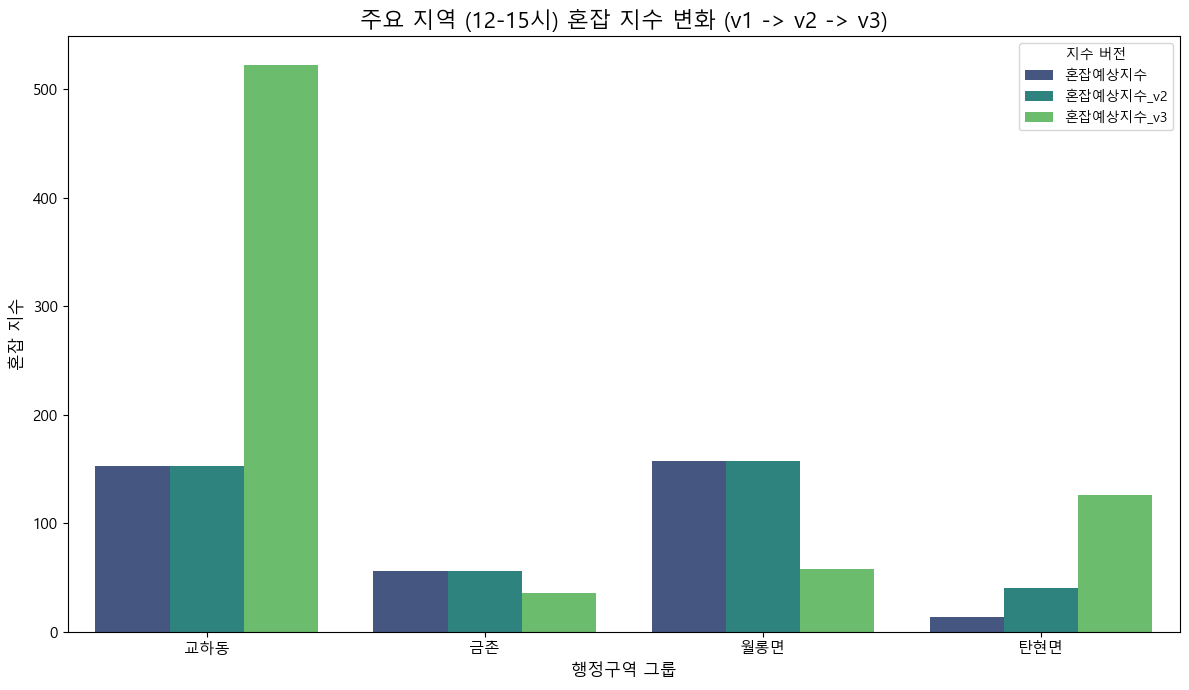


--- [시각화 2] 히트맵 저장 완료 --- 
'visualization\congestion_heatmap_v3.png'


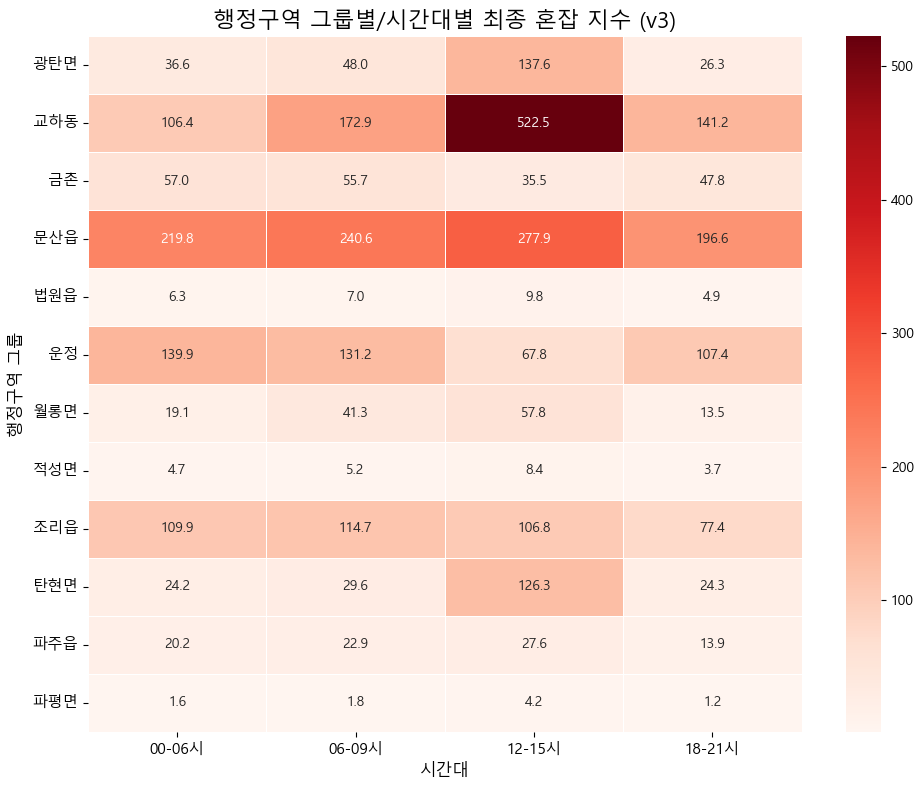

In [17]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib용) - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥OS의 경우 아래 주석 해제
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 5단계 결과 데이터 파일
final_data_path = os.path.join("normalization", "parking_congestion_index_v3_sales.csv")
# [출력] 시각화 결과 저장 폴더 (없으면 생성)
output_folder = "visualization"
os.makedirs(output_folder, exist_ok=True)

# --- 2. 최종 데이터 로드 (v3 포함) ---
try:
    df_final = pd.read_csv(final_data_path, encoding='utf-8-sig')
    print(f"--- 최종 데이터 로드 성공 --- \n'{final_data_path}' ({len(df_final)} 행)")
    print("\n최종 데이터 컬럼:", df_final.columns.tolist())
except Exception as e:
    print(f"!!! 최종 파일 로드 실패 (5단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. v3 기준 TOP/BOTTOM 10 재확인 ---
print("\n\n--- [분석 1] 혼잡 예상 지수 v3 TOP 10 (최종) ---")
top_10_v3 = df_final.sort_values(by='혼잡예상지수_v3', ascending=False)
print(top_10_v3[['행정구역_그룹', '시간대', '혼잡예상지수_v3']].head(10))

print("\n\n--- [분석 2] 혼잡 예상 지수 v3 BOTTOM 10 (최종) ---")
bottom_10_v3 = df_final.sort_values(by='혼잡예상지수_v3', ascending=True)
print(bottom_10_v3[['행정구역_그룹', '시간대', '혼잡예상지수_v3']].head(10))


# --- 4. 주요 지역/시간대별 지수 변화 비교 ---
# 예시: '월롱면 12-15시' (v1, v2 높았던 곳), '탄현면 12-15시' (관광지) 비교
print("\n\n--- [분석 3] 주요 지역/시간대 지수 변화 비교 ---")
comparison_spots = df_final[
    (df_final['행정구역_그룹'].isin(['월롱면', '탄현면', '금촌', '교하동'])) &
    (df_final['시간대'] == '12-15시')
]
print(comparison_spots[['행정구역_그룹', '시간대', '혼잡예상지수', '혼잡예상지수_v2', '혼잡예상지수_v3']].round(2)) # 소수점 2자리 반올림

# --- 5. 시각화 ①: 주요 지역 지수 변화 막대 그래프 ---
try:
    plt.figure(figsize=(12, 7))
    # 비교할 지수 컬럼만 선택
    comparison_melted = pd.melt(comparison_spots,
                                id_vars=['행정구역_그룹', '시간대'],
                                value_vars=['혼잡예상지수', '혼잡예상지수_v2', '혼잡예상지수_v3'],
                                var_name='지수_버전', value_name='혼잡도')

    sns.barplot(data=comparison_melted, x='행정구역_그룹', y='혼잡도', hue='지수_버전', palette='viridis')
    plt.title('주요 지역 (12-15시) 혼잡 지수 변화 (v1 -> v2 -> v3)', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('혼잡 지수', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='지수 버전')
    plt.tight_layout() # 그래프 요소들이 겹치지 않게 조정

    # 그래프 파일 저장
    graph_filename1 = os.path.join(output_folder, "congestion_index_comparison_bar.png")
    plt.savefig(graph_filename1)
    print(f"\n--- [시각화 1] 막대 그래프 저장 완료 --- \n'{graph_filename1}'")
    plt.show() # 노트북에 그래프 출력

except Exception as e:
    print(f"\n!!! 시각화 1 실패: {e}")
    print("matplotlib, seaborn 라이브러리가 설치되었는지 확인하세요.")


# --- 6. 시각화 ②: 전체 지역/시간대 혼잡도 히트맵 (v3 기준) ---
try:
    # 히트맵을 만들기 위해 데이터 형태 변경 (pivot_table)
    heatmap_data = df_final.pivot_table(index='행정구역_그룹', columns='시간대', values='혼잡예상지수_v3')
    # 시간대 순서 정렬
    time_order = ['00-06시', '06-09시', '12-15시', '18-21시']
    heatmap_data = heatmap_data[time_order]

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".1f", linewidths=.5) # annot=True: 숫자 표시, fmt=".1f": 소수점 1자리
    plt.title('행정구역 그룹별/시간대별 최종 혼잡 지수 (v3)', fontsize=16)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('행정구역 그룹', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11, rotation=0) # y축 레이블 회전 방지
    plt.tight_layout()

    # 히트맵 파일 저장
    graph_filename2 = os.path.join(output_folder, "congestion_heatmap_v3.png")
    plt.savefig(graph_filename2)
    print(f"\n--- [시각화 2] 히트맵 저장 완료 --- \n'{graph_filename2}'")
    plt.show() # 노트북에 히트맵 출력

except Exception as e:
    print(f"\n!!! 시각화 2 실패: {e}")

In [18]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib용) - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥OS의 경우 아래 주석 해제
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] v1 데이터 파일 (3단계 결과)
v1_data_path = os.path.join("normalization", "parking_congestion_index.csv")
# [출력] v1 시각화 결과 저장 폴더 (없으면 생성)
output_folder_v1 = "v1_visualization"
os.makedirs(output_folder_v1, exist_ok=True)

# --- 2. v1 데이터 로드 ---
try:
    df_v1 = pd.read_csv(v1_data_path, encoding='utf-8-sig')
    print(f"--- v1 데이터 로드 성공 --- \n'{v1_data_path}' ({len(df_v1)} 행)")
    # v1 지수 컬럼명 확인 (이전 단계에서 '혼잡예상지수'로 저장됨)
    v1_col_name = '혼잡예상지수'
    if v1_col_name not in df_v1.columns:
        print(f"!!! 오류: '{v1_col_name}' 컬럼을 찾을 수 없습니다.")
        raise ValueError("v1 컬럼명 확인 필요")
except Exception as e:
    print(f"!!! v1 파일 로드 실패 (3단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. 기술 통계 분석 ---
print(f"\n\n--- [v1 분석 1] '{v1_col_name}' 기술 통계 ---")
print(df_v1[v1_col_name].describe())

# --- 4. 시각화 ①: v1 혼잡 지수 분포 (히스토그램) ---
try:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_v1[v1_col_name], kde=True, bins=15) # kde=True: 밀도 곡선 표시
    plt.title('v1 혼잡 지수 분포 (생활인구 / 주차면수)', fontsize=16)
    plt.xlabel('v1 혼잡 지수', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_hist = os.path.join(output_folder_v1, "v1_congestion_histogram.png")
    plt.savefig(graph_filename_hist)
    print(f"\n--- [v1 시각화 1] 히스토그램 저장 완료 --- \n'{graph_filename_hist}'")
    # plt.show() # 노트북에 그래프 출력 (필요시 주석 해제)
    plt.close() # 다음 그래프를 위해 창 닫기

except Exception as e:
    print(f"\n!!! v1 시각화 1 (히스토그램) 실패: {e}")

# --- 5. 시각화 ②: 지역별 v1 혼잡 지수 비교 (박스플롯) ---
try:
    # 혼잡도 순으로 정렬하기 위해 지역별 평균 계산
    order = df_v1.groupby('행정구역_그룹')[v1_col_name].mean().sort_values(ascending=False).index

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_v1, x='행정구역_그룹', y=v1_col_name, order=order, palette='coolwarm')
    plt.title('행정구역 그룹별 v1 혼잡 지수 분포', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('v1 혼잡 지수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11) # x축 레이블 회전
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_box = os.path.join(output_folder_v1, "v1_congestion_boxplot_by_region.png")
    plt.savefig(graph_filename_box)
    print(f"\n--- [v1 시각화 2] 박스플롯 저장 완료 --- \n'{graph_filename_box}'")
    # plt.show()
    plt.close()

except Exception as e:
    print(f"\n!!! v1 시각화 2 (박스플롯) 실패: {e}")


# --- 6. 시각화 ③: 전체 지역/시간대 v1 혼잡도 히트맵 ---
try:
    # 히트맵 데이터 생성 (pivot_table)
    heatmap_data_v1 = df_v1.pivot_table(index='행정구역_그룹', columns='시간대', values=v1_col_name)
    # 시간대 순서 정렬
    time_order = ['00-06시', '06-09시', '12-15시', '18-21시']
    heatmap_data_v1 = heatmap_data_v1[time_order]
    # 지역 순서 정렬 (평균 혼잡도 높은 순)
    heatmap_data_v1 = heatmap_data_v1.loc[order] # 박스플롯 순서와 동일하게

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_v1, cmap='Reds', annot=True, fmt=".1f", linewidths=.5)
    plt.title('행정구역 그룹별/시간대별 v1 혼잡 지수', fontsize=16)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('행정구역 그룹', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11, rotation=0)
    plt.tight_layout()

    # 히트맵 파일 저장
    graph_filename_heatmap = os.path.join(output_folder_v1, "v1_congestion_heatmap.png")
    plt.savefig(graph_filename_heatmap)
    print(f"\n--- [v1 시각화 3] 히트맵 저장 완료 --- \n'{graph_filename_heatmap}'")
    # plt.show()
    plt.close()

except Exception as e:
    print(f"\n!!! v1 시각화 3 (히트맵) 실패: {e}")

print("\n\n--- v1 분석 및 시각화 완료 ---")

--- v1 데이터 로드 성공 --- 
'normalization\parking_congestion_index.csv' (48 행)


--- [v1 분석 1] '혼잡예상지수' 기술 통계 ---
count     48.000000
mean      60.304275
std       39.018266
min        8.061142
25%       22.892512
50%       59.497385
75%       81.805113
max      157.543492
Name: 혼잡예상지수, dtype: float64

--- [v1 시각화 1] 히스토그램 저장 완료 --- 
'v1_visualization\v1_congestion_histogram.png'

--- [v1 시각화 2] 박스플롯 저장 완료 --- 
'v1_visualization\v1_congestion_boxplot_by_region.png'

--- [v1 시각화 3] 히트맵 저장 완료 --- 
'v1_visualization\v1_congestion_heatmap.png'


--- v1 분석 및 시각화 완료 ---


In [19]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib용) - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥OS의 경우 아래 주석 해제
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] v2 데이터 파일 (4단계 결과)
v2_data_path = os.path.join("normalization", "parking_congestion_index_v2_tourism.csv")
# [출력] v2 시각화 결과 저장 폴더 (없으면 생성)
output_folder_v2 = "v2_visualization"
os.makedirs(output_folder_v2, exist_ok=True)

# --- 2. v2 데이터 로드 ---
try:
    df_v2 = pd.read_csv(v2_data_path, encoding='utf-8-sig')
    print(f"--- v2 데이터 로드 성공 --- \n'{v2_data_path}' ({len(df_v2)} 행)")
    # v2 지수 컬럼명 확인
    v2_col_name = '혼잡예상지수_v2'
    if v2_col_name not in df_v2.columns:
        print(f"!!! 오류: '{v2_col_name}' 컬럼을 찾을 수 없습니다.")
        raise ValueError("v2 컬럼명 확인 필요")
except Exception as e:
    print(f"!!! v2 파일 로드 실패 (4단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. 기술 통계 분석 ---
print(f"\n\n--- [v2 분석 1] '{v2_col_name}' 기술 통계 ---")
print(df_v2[v2_col_name].describe())

# --- 4. 시각화 ①: v2 혼잡 지수 분포 (히스토그램) ---
try:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_v2[v2_col_name], kde=True, bins=15)
    plt.title('v2 혼잡 지수 분포 (생활인구+관광객 / 주차면수)', fontsize=16)
    plt.xlabel('v2 혼잡 지수', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_hist_v2 = os.path.join(output_folder_v2, "v2_congestion_histogram.png")
    plt.savefig(graph_filename_hist_v2)
    print(f"\n--- [v2 시각화 1] 히스토그램 저장 완료 --- \n'{graph_filename_hist_v2}'")
    plt.close() # 다음 그래프 위해 창 닫기

except Exception as e:
    print(f"\n!!! v2 시각화 1 (히스토그램) 실패: {e}")

# --- 5. 시각화 ②: 지역별 v2 혼잡 지수 비교 (박스플롯) ---
try:
    # 혼잡도 순으로 정렬 (v2 기준)
    order_v2 = df_v2.groupby('행정구역_그룹')[v2_col_name].mean().sort_values(ascending=False).index

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_v2, x='행정구역_그룹', y=v2_col_name, order=order_v2, palette='coolwarm')
    plt.title('행정구역 그룹별 v2 혼잡 지수 분포 (관광객 반영)', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('v2 혼잡 지수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_box_v2 = os.path.join(output_folder_v2, "v2_congestion_boxplot_by_region.png")
    plt.savefig(graph_filename_box_v2)
    print(f"\n--- [v2 시각화 2] 박스플롯 저장 완료 --- \n'{graph_filename_box_v2}'")
    plt.close()

except Exception as e:
    print(f"\n!!! v2 시각화 2 (박스플롯) 실패: {e}")


# --- 6. 시각화 ③: 전체 지역/시간대 v2 혼잡도 히트맵 ---
try:
    # 히트맵 데이터 생성 (pivot_table)
    heatmap_data_v2 = df_v2.pivot_table(index='행정구역_그룹', columns='시간대', values=v2_col_name)
    # 시간대 순서 정렬
    time_order = ['00-06시', '06-09시', '12-15시', '18-21시']
    heatmap_data_v2 = heatmap_data_v2[time_order]
    # 지역 순서 정렬 (v2 평균 혼잡도 높은 순)
    heatmap_data_v2 = heatmap_data_v2.loc[order_v2]

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_v2, cmap='Reds', annot=True, fmt=".1f", linewidths=.5)
    plt.title('행정구역 그룹별/시간대별 v2 혼잡 지수 (관광객 반영)', fontsize=16)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('행정구역 그룹', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11, rotation=0)
    plt.tight_layout()

    # 히트맵 파일 저장
    graph_filename_heatmap_v2 = os.path.join(output_folder_v2, "v2_congestion_heatmap.png")
    plt.savefig(graph_filename_heatmap_v2)
    print(f"\n--- [v2 시각화 3] 히트맵 저장 완료 --- \n'{graph_filename_heatmap_v2}'")
    plt.close()

except Exception as e:
    print(f"\n!!! v2 시각화 3 (히트맵) 실패: {e}")

print("\n\n--- v2 분석 및 시각화 완료 ---")

--- v2 데이터 로드 성공 --- 
'normalization\parking_congestion_index_v2_tourism.csv' (48 행)


--- [v2 분석 1] '혼잡예상지수_v2' 기술 통계 ---
count     48.000000
mean      62.845688
std       40.981624
min       10.509600
25%       24.810707
50%       59.497385
75%       81.805113
max      157.543492
Name: 혼잡예상지수_v2, dtype: float64

--- [v2 시각화 1] 히스토그램 저장 완료 --- 
'v2_visualization\v2_congestion_histogram.png'

--- [v2 시각화 2] 박스플롯 저장 완료 --- 
'v2_visualization\v2_congestion_boxplot_by_region.png'

--- [v2 시각화 3] 히트맵 저장 완료 --- 
'v2_visualization\v2_congestion_heatmap.png'


--- v2 분석 및 시각화 완료 ---


In [20]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib용) - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥OS의 경우 아래 주석 해제
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] v3 데이터 파일 (5단계 결과)
v3_data_path = os.path.join("normalization", "parking_congestion_index_v3_sales.csv")
# [출력] v3 시각화 결과 저장 폴더 (없으면 생성)
output_folder_v3 = "v3_visualization"
os.makedirs(output_folder_v3, exist_ok=True)

# --- 2. v3 데이터 로드 ---
try:
    df_v3 = pd.read_csv(v3_data_path, encoding='utf-8-sig')
    print(f"--- v3 데이터 로드 성공 --- \n'{v3_data_path}' ({len(df_v3)} 행)")
    # v3 지수 컬럼명 확인
    v3_col_name = '혼잡예상지수_v3'
    if v3_col_name not in df_v3.columns:
        print(f"!!! 오류: '{v3_col_name}' 컬럼을 찾을 수 없습니다.")
        raise ValueError("v3 컬럼명 확인 필요")
except Exception as e:
    print(f"!!! v3 파일 로드 실패 (5단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. 기술 통계 분석 ---
print(f"\n\n--- [v3 분석 1] '{v3_col_name}' 기술 통계 ---")
print(df_v3[v3_col_name].describe())

# --- 4. 시각화 ①: v3 혼잡 지수 분포 (히스토그램) ---
try:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_v3[v3_col_name], kde=True, bins=15)
    plt.title('v3 혼잡 지수 분포 ((생활인구+관광객)*상권가중치 / 주차면수)', fontsize=16)
    plt.xlabel('v3 혼잡 지수', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_hist_v3 = os.path.join(output_folder_v3, "v3_congestion_histogram.png")
    plt.savefig(graph_filename_hist_v3)
    print(f"\n--- [v3 시각화 1] 히스토그램 저장 완료 --- \n'{graph_filename_hist_v3}'")
    plt.close() # 다음 그래프 위해 창 닫기

except Exception as e:
    print(f"\n!!! v3 시각화 1 (히스토그램) 실패: {e}")

# --- 5. 시각화 ②: 지역별 v3 혼잡 지수 비교 (박스플롯) ---
try:
    # 혼잡도 순으로 정렬 (v3 기준)
    order_v3 = df_v3.groupby('행정구역_그룹')[v3_col_name].mean().sort_values(ascending=False).index

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_v3, x='행정구역_그룹', y=v3_col_name, order=order_v3, palette='coolwarm')
    plt.title('행정구역 그룹별 v3 혼잡 지수 분포 (상권 반영)', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('v3 혼잡 지수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_box_v3 = os.path.join(output_folder_v3, "v3_congestion_boxplot_by_region.png")
    plt.savefig(graph_filename_box_v3)
    print(f"\n--- [v3 시각화 2] 박스플롯 저장 완료 --- \n'{graph_filename_box_v3}'")
    plt.close()

except Exception as e:
    print(f"\n!!! v3 시각화 2 (박스플롯) 실패: {e}")


# --- 6. 시각화 ③: 전체 지역/시간대 v3 혼잡도 히트맵 ---
try:
    # 히트맵 데이터 생성 (pivot_table)
    heatmap_data_v3 = df_v3.pivot_table(index='행정구역_그룹', columns='시간대', values=v3_col_name)
    # 시간대 순서 정렬
    time_order = ['00-06시', '06-09시', '12-15시', '18-21시']
    heatmap_data_v3 = heatmap_data_v3[time_order]
    # 지역 순서 정렬 (v3 평균 혼잡도 높은 순)
    heatmap_data_v3 = heatmap_data_v3.loc[order_v3]

    plt.figure(figsize=(10, 8))
    # annot 값의 소수점 자릿수를 조정 (값이 너무 크면 정수로 표시)
    annot_kws = {"size": 8} # 글자 크기 조정
    fmt_val = ".1f" if heatmap_data_v3.max().max() < 1000 else ".0f" # 최댓값 기준으로 포맷 결정

    sns.heatmap(heatmap_data_v3, cmap='Reds', annot=True, fmt=fmt_val, linewidths=.5, annot_kws=annot_kws)
    plt.title('행정구역 그룹별/시간대별 v3 혼잡 지수 (상권 반영)', fontsize=16)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('행정구역 그룹', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11, rotation=0)
    plt.tight_layout()

    # 히트맵 파일 저장
    graph_filename_heatmap_v3 = os.path.join(output_folder_v3, "v3_congestion_heatmap.png")
    plt.savefig(graph_filename_heatmap_v3)
    print(f"\n--- [v3 시각화 3] 히트맵 저장 완료 --- \n'{graph_filename_heatmap_v3}'")
    plt.close()

except Exception as e:
    print(f"\n!!! v3 시각화 3 (히트맵) 실패: {e}")

print("\n\n--- v3 분석 및 시각화 완료 ---")

--- v3 데이터 로드 성공 --- 
'normalization\parking_congestion_index_v3_sales.csv' (48 행)


--- [v3 분석 1] '혼잡예상지수_v3' 기술 통계 ---
count     48.000000
mean      76.188406
std       95.890312
min        1.180996
25%       12.561410
50%       38.980692
75%      111.068189
max      522.487049
Name: 혼잡예상지수_v3, dtype: float64

--- [v3 시각화 1] 히스토그램 저장 완료 --- 
'v3_visualization\v3_congestion_histogram.png'

--- [v3 시각화 2] 박스플롯 저장 완료 --- 
'v3_visualization\v3_congestion_boxplot_by_region.png'

--- [v3 시각화 3] 히트맵 저장 완료 --- 
'v3_visualization\v3_congestion_heatmap.png'


--- v3 분석 및 시각화 완료 ---


In [21]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (matplotlib용) - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 맥OS의 경우 아래 주석 해제
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
warnings.filterwarnings('ignore')

# --- 1. 경로 설정 ---
# [입력] 최종 데이터 파일 (v3, 5단계 결과)
final_data_path = os.path.join("normalization", "parking_congestion_index_v3_sales.csv")
# [출력] 비교 시각화 결과 저장 폴더 (없으면 생성)
output_folder_comp = "comparison_visualization"
os.makedirs(output_folder_comp, exist_ok=True)

# --- 2. 최종 데이터 로드 ---
try:
    df_final = pd.read_csv(final_data_path, encoding='utf-8-sig')
    print(f"--- 최종 데이터 로드 성공 --- \n'{final_data_path}' ({len(df_final)} 행)")
    # 컬럼명 확인 및 간결하게 변경 (v1 컬럼명이 '혼잡예상지수'였음)
    df_final = df_final.rename(columns={'혼잡예상지수': 'v1_혼잡지수'})
    if '혼잡예상지수_v2' not in df_final.columns: df_final['혼잡예상지수_v2'] = df_final['v1_혼잡지수'] # v2 컬럼 없을 경우 대비
    if '혼잡예상지수_v3' not in df_final.columns: df_final['혼잡예상지수_v3'] = df_final['혼잡예상지수_v2'] # v3 컬럼 없을 경우 대비

    v1_col, v2_col, v3_col = 'v1_혼잡지수', '혼잡예상지수_v2', '혼잡예상지수_v3' # 변수로 저장

except Exception as e:
    print(f"!!! 최종 파일 로드 실패 (5단계를 다시 확인하세요) !!! \n{e}")
    raise e

# --- 3. 전체 분포 비교 ---
print("\n\n--- [비교 분석 1] v1, v2, v3 기술 통계 비교 ---")
print(df_final[[v1_col, v2_col, v3_col]].describe().round(2))

try:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_final[[v1_col, v2_col, v3_col]], palette='magma')
    plt.title('혼잡 지수 버전별 분포 비교 (Box Plot)', fontsize=16)
    plt.ylabel('혼잡 지수', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_boxplot_comp = os.path.join(output_folder_comp, "comparison_boxplot_v1_v2_v3.png")
    plt.savefig(graph_filename_boxplot_comp)
    print(f"\n--- [비교 시각화 1] 전체 분포 박스플롯 저장 완료 --- \n'{graph_filename_boxplot_comp}'")
    plt.close()

except Exception as e:
    print(f"\n!!! 비교 시각화 1 (박스플롯) 실패: {e}")


# --- 4. 순위 변화 분석 (TOP 5) ---
print("\n\n--- [비교 분석 2] 버전별 TOP 5 혼잡 지역/시간대 비교 ---")
top5_v1 = df_final.sort_values(by=v1_col, ascending=False).head(5)[['행정구역_그룹', '시간대', v1_col]].reset_index(drop=True)
top5_v2 = df_final.sort_values(by=v2_col, ascending=False).head(5)[['행정구역_그룹', '시간대', v2_col]].reset_index(drop=True)
top5_v3 = df_final.sort_values(by=v3_col, ascending=False).head(5)[['행정구역_그룹', '시간대', v3_col]].reset_index(drop=True)

df_top5_comparison = pd.concat([top5_v1, top5_v2, top5_v3], axis=1)
df_top5_comparison.columns = ['지역(v1)', '시간(v1)', '지수(v1)', '지역(v2)', '시간(v2)', '지수(v2)', '지역(v3)', '시간(v3)', '지수(v3)']
print(df_top5_comparison.round(1))


# --- 5. 관광객 영향 분석 ---
df_final['관광객_영향'] = df_final[v2_col] - df_final[v1_col]
df_tourism_impact = df_final.sort_values(by='관광객_영향', ascending=False)

print("\n\n--- [비교 분석 3] 관광객 추가로 인한 혼잡 지수 변화량 TOP 5 ---")
print(df_tourism_impact[['행정구역_그룹', '시간대', '총_관광객수', '관광객_영향']].head().round(1))

try:
    plt.figure(figsize=(12, 6))
    # 상위 10개만 시각화
    sns.barplot(data=df_tourism_impact.head(10), x='행정구역_그룹', y='관광객_영향', hue='시간대', palette='Blues', dodge=False)
    plt.title('관광객 추가로 인한 혼잡 지수 변화량 (v2 - v1)', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('혼잡 지수 변화량', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='시간대', bbox_to_anchor=(1.02, 1), loc='upper left') # 범례 바깥으로 빼기
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_tourism_impact = os.path.join(output_folder_comp, "comparison_tourism_impact_bar.png")
    plt.savefig(graph_filename_tourism_impact, bbox_inches='tight') # 범례 잘리지 않게 저장
    print(f"\n--- [비교 시각화 2] 관광객 영향 막대 그래프 저장 완료 --- \n'{graph_filename_tourism_impact}'")
    plt.close()

except Exception as e:
    print(f"\n!!! 비교 시각화 2 (관광객 영향) 실패: {e}")


# --- 6. 상권 영향 분석 ---
df_final['상권_영향'] = df_final[v3_col] - df_final[v2_col]
df_sales_impact = df_final.sort_values(by='상권_영향', ascending=False)

print("\n\n--- [비교 분석 4] 상권 가중치 적용으로 인한 혼잡 지수 변화량 TOP 5 ---")
# 상권 가중치가 1보다 큰 경우만 필터링해서 볼 수도 있음
# df_sales_impact_positive = df_sales_impact[df_sales_impact['상권가중치'] > 1]
print(df_sales_impact[['행정구역_그룹', '시간대', '매출액_백만원', '상권가중치', '상권_영향']].head().round(2))

try:
    plt.figure(figsize=(12, 6))
    # 변화량 상위 10개 시각화
    sns.barplot(data=df_sales_impact.head(10), x='행정구역_그룹', y='상권_영향', hue='시간대', palette='Greens', dodge=False)
    plt.title('상권 가중치 적용으로 인한 혼잡 지수 변화량 (v3 - v2)', fontsize=16)
    plt.xlabel('행정구역 그룹', fontsize=12)
    plt.ylabel('혼잡 지수 변화량', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='시간대', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_sales_impact = os.path.join(output_folder_comp, "comparison_sales_impact_bar.png")
    plt.savefig(graph_filename_sales_impact, bbox_inches='tight')
    print(f"\n--- [비교 시각화 3] 상권 영향 막대 그래프 저장 완료 --- \n'{graph_filename_sales_impact}'")
    plt.close()

except Exception as e:
    print(f"\n!!! 비교 시각화 3 (상권 영향) 실패: {e}")


# --- 7. 종합 시각화: 주요 지역별 지수 변화 선 그래프 ---
try:
    # 비교할 주요 지역 선택 (예: 혼잡 상위 지역, 관광지, 상권 중심지 등)
    regions_to_plot = ['월롱면', '교하동', '조리읍', '문산읍', '탄현면', '금촌', '운정']
    df_plot = df_final[df_final['행정구역_그룹'].isin(regions_to_plot)]

    # 시간대별로 그래프 그리기 (FacetGrid 사용)
    g = sns.FacetGrid(df_plot, col="시간대", col_wrap=2, height=4, aspect=1.5, sharey=False) # sharey=False: 각 그래프 y축 다르게
    g.map_dataframe(sns.pointplot, x='행정구역_그룹', y=v1_col, color='grey', label='v1', order=regions_to_plot)
    g.map_dataframe(sns.pointplot, x='행정구역_그룹', y=v2_col, color='blue', label='v2 (관광)', order=regions_to_plot)
    g.map_dataframe(sns.pointplot, x='행정구역_그룹', y=v3_col, color='red', label='v3 (상권)', order=regions_to_plot)

    g.set_titles("{col_name}", size=14)
    g.set_xticklabels(rotation=45, ha='right')
    g.set_axis_labels("행정구역 그룹", "혼잡 지수")
    g.add_legend(title="지수 버전")
    plt.suptitle('주요 지역별 시간대별 혼잡 지수 변화 (v1 -> v2 -> v3)', y=1.02, fontsize=16) # 전체 제목
    plt.tight_layout()

    # 그래프 파일 저장
    graph_filename_line_comp = os.path.join(output_folder_comp, "comparison_lineplot_v1_v2_v3.png")
    plt.savefig(graph_filename_line_comp)
    print(f"\n--- [비교 시각화 4] 종합 선 그래프 저장 완료 --- \n'{graph_filename_line_comp}'")
    plt.close()

except Exception as e:
    print(f"\n!!! 비교 시각화 4 (종합 선 그래프) 실패: {e}")

print("\n\n--- v1, v2, v3 비교 분석 및 시각화 완료 ---")

--- 최종 데이터 로드 성공 --- 
'normalization\parking_congestion_index_v3_sales.csv' (48 행)


--- [비교 분석 1] v1, v2, v3 기술 통계 비교 ---
       v1_혼잡지수  혼잡예상지수_v2  혼잡예상지수_v3
count    48.00      48.00      48.00
mean     60.30      64.62      76.19
std      39.02      42.33      95.89
min       8.06      10.51       1.18
25%      22.89      24.81      12.56
50%      59.50      59.74      38.98
75%      81.81      92.51     111.07
max     157.54     160.28     522.49

--- [비교 시각화 1] 전체 분포 박스플롯 저장 완료 --- 
'comparison_visualization\comparison_boxplot_v1_v2_v3.png'


--- [비교 분석 2] 버전별 TOP 5 혼잡 지역/시간대 비교 ---
  지역(v1)  시간(v1)  지수(v1) 지역(v2)  시간(v2)  지수(v2) 지역(v3)  시간(v3)  지수(v3)
0    월롱면  12-15시   157.5    문산읍  12-15시   160.3    교하동  12-15시   522.5
1    교하동  12-15시   152.7    월롱면  12-15시   157.5    문산읍  12-15시   277.9
2    조리읍  06-09시   117.2    교하동  12-15시   152.7    문산읍  06-09시   240.6
3    조리읍  00-06시   112.2    광탄면  12-15시   132.0    문산읍  00-06시   219.8
4    조리읍  12-15시   111.4    문산읍  06-09시   120.5  